In [1]:
from pylab import *
%matplotlib inline

Se utiliza el metodo de Runge Kutta con argumentos

In [2]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

Se define la ecuacion de movimiento de la particula de carga q > 0 y de masa m = 1.
$$ \vec F = -k\vec r + \frac {qq´} {|r|^3} \vec r  - \vec f_{fric} $$

In [3]:
def e_mov(r_v,t,fric=0,k=1,q=1,q_o=1): # se definieron k=1 y q = qo = 1
    dx = r_v[2]
    dy = r_v[3]
    if fric == 0:
        dvx,dvy = -k*r_v[0] + q_o*q*r_v[0]/((r_v[0]**2+r_v[1]**2)**1.5),-k*r_v[1] + q_o*q*r_v[1]/((r_v[0]**2+r_v[1]**2)**1.5)
        #No se uso un modelo de friccion
    else:    
        dvx = -k*r_v[0] + q_o*q*r_v[0]/((r_v[0]**2+r_v[1]**2))**1.5 - fric([dx,dy])[0]
        dvy = -k*r_v[1] + q_o*q*r_v[1]/((r_v[0]**2+r_v[1]**2))**1.5 - fric([dx,dy])[1]
        # Se uso un modelo de friccion - fric([dx,dy])
    return array([dx,dy,dvx,dvy])

Se define el modelo de friccion
$$ \vec f_{fric} = -\gamma \vec v \:  si  \:   |r|  \leqq 1 \\ \vec f_{fric} = -\mu v^{3/2} \vec v \:  si  \:   |r|  \ > 1  $$

In [4]:
def fric_v(v,gamma=0.1,mu=0.2):
    norm_v = sqrt(v[0]**2 + v[1]**2)
    if norm_v < 1:
        f_x = gamma*v[0]
        f_y = gamma*v[1]
    else:    
        f_x = mu*(norm_v**(1.5))*v[0]
        f_y = mu*(norm_v**(1.5))*v[1]
    return array([f_x,f_y]) 

a) Sin considerar la friccíon, ¿El sistema puede tener órbitas cerradas?. De ser así, encuentre algunas
de estas órbitas o muestre que el sistema no puede tener este tipo de órbitas. (Apoye sus
argumentos con alguna simulacíon).

La siguiente grafica muestra la energia potencial del sistema 
$$ E_{pot} = \frac {1} {2} k|r|^2 + \frac {qq} {|r|}  $$

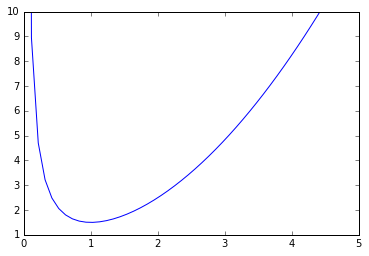

In [5]:
def potencial(x):
    E = .5*(x**2)+1/x
    return E
x=linspace(.01,5)
plot(x,potencial(x))
ylim(1,10)
show()

Como primer aproximacion de la energia potencial del sistema en la grafica anterior, se observa que hay un minimo de energia en el intervalo (.5,1.5). 
$$\\$$La siguiente grafica muestra la energia total del sistema 
$$ E_{pot} = \frac {1} {2} k|r|^2 + \frac {1} {2} m|v|^2 + \frac {qq} {|r|}  $$

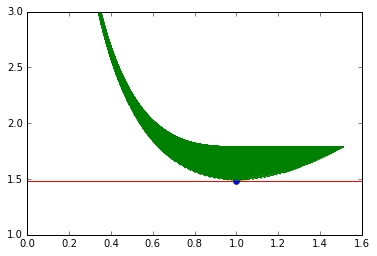

In [6]:
p = [0,1.5,.1,0] # se hace una simulacion con condiciones iniciales ro = (0,1.5) que es donde se encuentra un minimo
t,sol_id=rk4(e_mov,p,[0,400]) #de energia potencial, y con vo = (.1,0) poca velocidad en direccion x (muy poca energia cinetica)
norm_v_id = (sol_id[:,2]**2 + sol_id[:,3]**2)
norm_r_id = (sol_id[:,0]**2 + sol_id[:,1]**2)
E_id = .5*((abs(sol_id[:,0]))**2 + (abs(sol_id[:,2]))**2) + 1/(abs(sol_id[:,0])+.01)
ylim(1,3)
plt.axhline(1.48,color='red')
plot(1,1.48,'o')
plot(abs(sol_id[:,0])+.01,E_id)
show()

De la grafica anterior tenemos que el punto |r| = 1 es un minimo de energia para el sistema, por lo tanto en ese punto existe una orbita cerrada 

# Existen orbitas cerradas para los puntos minimos de energia del sistema

Con la siguinte simulacion se muestra la orbita cerrada circular para el sistema

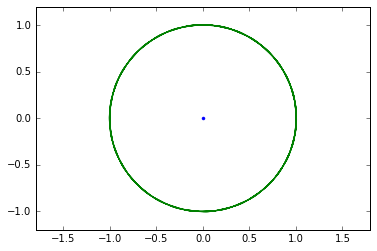

In [7]:
p = [0,1,.1,0] # bajo las condiciones |ro| = |(0,1)| = 1 y con vo = (.1,0)  poca velocidad en direccion x 
t,sol_id=rk4(e_mov,p,[0,400])
xlim(-1.8,1.8)
ylim(-1.2,1.2)
plot(0,0,'.',sol_id[:,0],sol_id[:,1])
show()

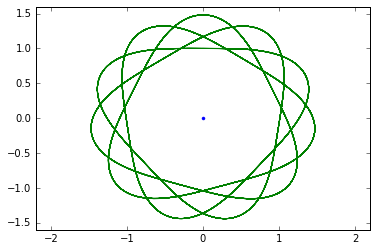

In [13]:
p = [0,1,1,0] # bajo las condiciones |ro| = |(0,1)| = 1 y con vo = (1,0)  
t,sol_id=rk4(e_mov,p,[0,400])
xlim(-2.2,2.2)
ylim(-1.6,1.6)
plot(0,0,'.',sol_id[:,0],sol_id[:,1])
show()

# En las anteriores simulaciones se observa que la partícula, con las respectivas condiciones iniciales  presenta órbitas cerradas

b) Considerando friccíon, ¿El sistema puede tener órbitas cerradas?. De ser así, encuentre algunas de
estas órbitas o muestre que el sistema no puede tener este tipo de órbitas. (Apoye sus argumentos
con alguna simulacíon).

# En  el inciso anterior vimos que existen órbitas cerradas para los puntos mínimos de energía del sistema, pero para que que exista una órbita debe de existir una velocidad constante de traslación de la partícula, y como hay fricción en el sistema cualquier velocidad de traslación disminuirá hasta volverse cero, de tal manera que la órbita cerrada no podrá existir, la energía cinética se pierde.

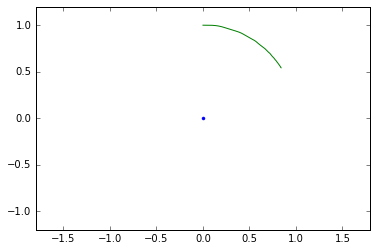

In [14]:
p = [0,1,.1,0]
t,sol_fv=rk4(e_mov,p,[0,600],fric_v)
xlim(-1.8,1.8)
ylim(-1.2,1.2)
plot(0,0,'.',sol_fv[:,0],sol_fv[:,1])
show()

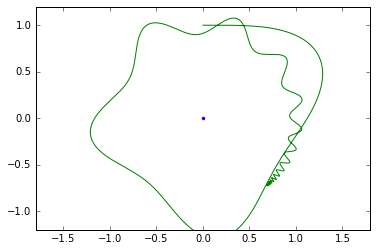

In [15]:
p = [0,1,1,0]
t,sol_fv=rk4(e_mov,p,[0,600],fric_v)
xlim(-1.8,1.8)
ylim(-1.2,1.2)
plot(0,0,'.',sol_fv[:,0],sol_fv[:,1])
show()

# En las anteriores simulaciones se observa que la partícula, con las mismas condiciones iniciales para las cueles presentaba órbitas cerradas, pierde velocidad hasta detenerse completamente